# Diamond Price Prediction

## Required Libraries 

In [109]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Importing the csv file i.e the dataset is stored as a dataframe

In [110]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Regression Datasets\\DiamondPricesData.csv')

In [111]:
df.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [112]:
df=df.rename(columns={"x": "length", "y": "width","z":"height"})

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   height   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [114]:
df.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
length     float64
width      float64
height     float64
dtype: object

In [115]:
df.shape

(53940, 10)

In [116]:
df.describe()

,price,carat,depth,table,length,width,height
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   height   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [118]:
df.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
length      0
width       0
height      0
dtype: int64

In [119]:
df['color'].fillna(df['color'].mode()[0],inplace=True)

In [120]:
df.isnull().sum()

price       0
carat       0
cut         0
color       0
clarity     0
depth      14
table       0
length      0
width       0
height      0
dtype: int64

In [121]:
df['depth'].fillna(df['depth'].median(),inplace = True)

In [122]:
df.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
dtype: int64

## Detecting Outliers

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>]], dtype=object)

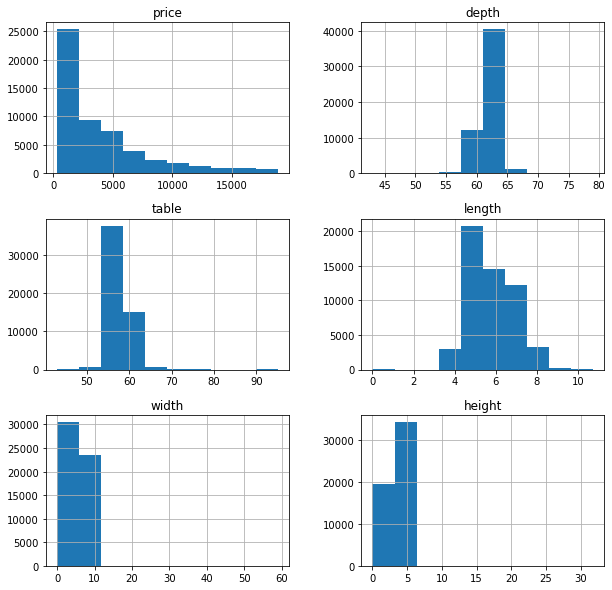

In [123]:
df.hist(['price','depth','table','length','width','height'],figsize=(10,10))

## Treating Outliers

In [124]:
df['length'][df['length']<2].sort_values()

11182    0.0
11963    0.0
15951    0.0
24520    0.0
26243    0.0
27429    0.0
49556    0.0
49557    0.0
Name: length, dtype: float64

In [125]:
df['table'][df['table']>90].sort_values()

24932    95.0
Name: table, dtype: float64

In [126]:
df['table'][df['table']>90]=70
df['length'][df['length']<2]=5

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'table'}>]], dtype=object)

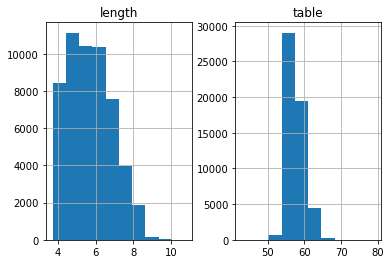

In [127]:
df.hist(['length','table'])

Hence, it's observed that the outliers are treated

<AxesSubplot:>

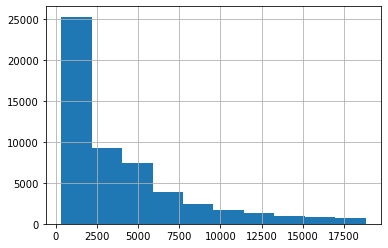

In [128]:
df['price'].hist()

# Doing the staistical tests for identifying predictors

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [129]:
df.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length',
       'width', 'height'],
      dtype='object')

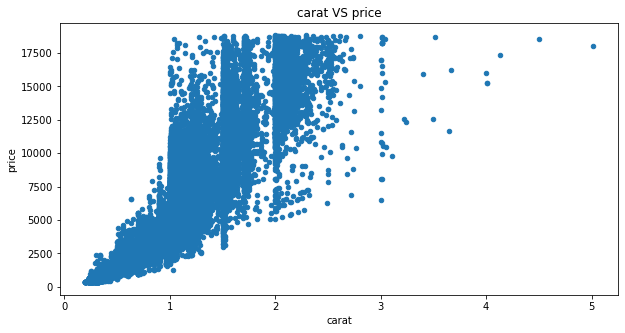

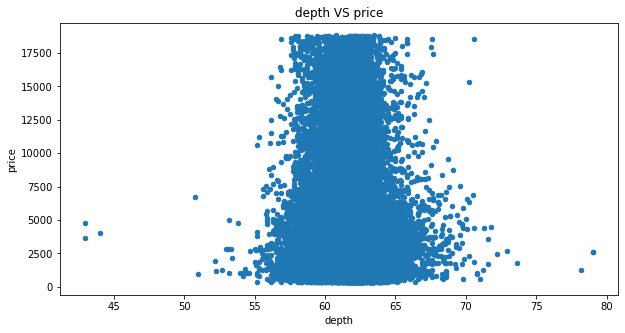

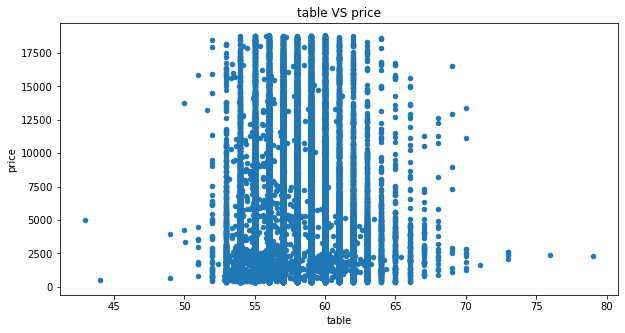

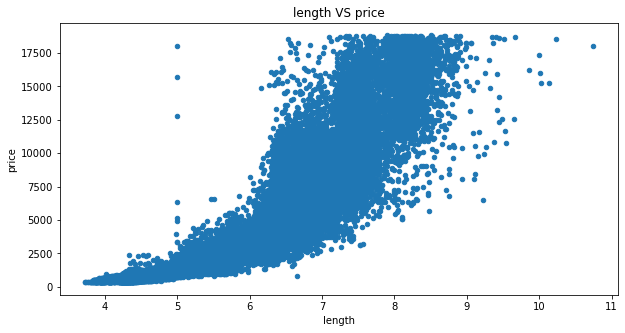

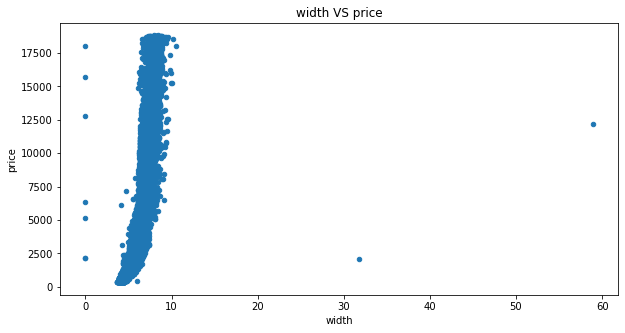

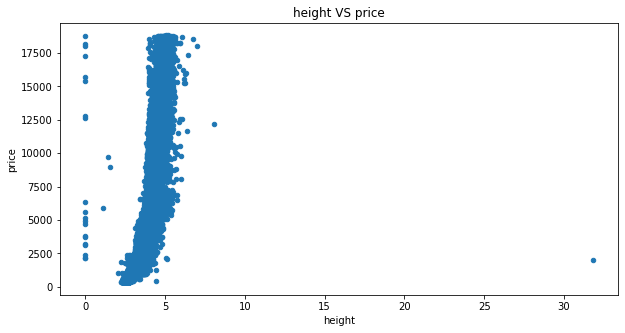

In [130]:
ContinuousCols=['carat','depth','table','length','width','height']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

## Correlation test

As all the variables are continuous, doing the correlation test to find the best predictors is enough. ANOVA test and chi square tests are not applicable for the present dataset

In [131]:
ContCol=['carat','depth','table','length','width','height','price']
CorrData=df[ContCol].corr()
CorrData

,carat,depth,table,length,width,height,price
carat,1.000000,0.028242,0.181510,0.977525,0.951722,0.953387,0.921591
depth,0.028242,1.000000,-0.295899,-0.025080,-0.029297,0.094957,-0.010651
table,0.181510,-0.295899,1.000000,0.196003,0.183720,0.150889,0.126938
length,0.977525,-0.025080,0.196003,1.000000,0.973717,0.969305,0.886867
width,0.951722,-0.029297,0.183720,0.973717,1.000000,0.952006,0.865421
height,0.953387,0.094957,0.150889,0.969305,0.952006,1.000000,0.861249
price,0.921591,-0.010651,0.126938,0.886867,0.865421,0.861249,1.000000


In [132]:
CorrData['price'][abs(CorrData['price'])>0.5]

carat     0.921591
length    0.886867
width     0.865421
height    0.861249
price     1.000000
Name: price, dtype: float64

## ANOVA test

In [133]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [134]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut','color','clarity']
FunctionAnova(inpData=df, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 8.42830730759452e-150
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316


['cut', 'color', 'clarity']

### Best predictors are 
- cut 
- color
- clarity
- carat
- length
- width 
- height 

## Creating data for Machine Learning 

In [135]:
SelectColumns=['price','cut','color','clarity','carat','length','width','height']
DataForML=df[SelectColumns]
DataForML.head()


,price,cut,color,clarity,carat,length,width,height
0,326,Ideal,E,SI2,0.23,3.95,3.98,2.43
1,326,Premium,E,SI1,0.21,3.89,3.84,2.31
2,327,Good,E,VS1,0.23,4.05,4.07,2.31
3,334,Premium,I,VS2,0.29,4.20,4.23,2.63
4,335,Good,J,SI2,0.31,4.34,4.35,2.75


## Categorical Handling 

In [136]:
DataForML['cut']=DataForML['cut'].replace({'Ideal':1,'Premium':2,'Good':3,'Very Good':4,'Fair':5})
DataForML['color']=DataForML['color'].replace({'E':5,'I':8,'J':9,'H':8,'F':6,'G':8,'D':4})
DataForML['clarity']=DataForML['clarity'].replace({'SI2':102,'SI1':101,'VS1':201,'VS2':202,'VVS2':301,'VVS1':302,'I1':21,'IF':22})

## Machine Learning Splitting the data into 70:30 Ratio

In [137]:
TargetVariable='price'
Predictors=['cut','color','clarity','carat','length','width','height']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [138]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37758, 7)
(37758,)
(16182, 7)
(16182,)


In [140]:
X_train[0:4]

array([[0.        , 0.8       , 0.99644128, 0.20997921, 0.45506419,
        0.11663837, 0.13301887],
       [0.        , 0.2       , 0.64412811, 0.02286902, 0.09272468,
        0.07402377, 0.08522013],
       [0.        , 0.2       , 0.6405694 , 0.20997921, 0.43081312,
        0.11595925, 0.13333333],
       [0.        , 0.4       , 0.28825623, 0.12681913, 0.31241084,
        0.10118846, 0.11698113]])

# Multiple Linear Regression

In [141]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8820539849077993

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    559           637.0
1   2201          2780.0
2   1238          2223.0
3   1304          2241.0
4   6901         10290.0
Mean Accuracy on test data: 61.822061683029204
Median Accuracy on test data: 77.32448416642956

Accuracy values for 10-fold Cross Validation:
 [64.21505655 72.54071271 79.36644625 76.75046073 75.86112575 34.53729219
 23.09184108 39.87477442 60.33548816 66.28156615]

Final Average Accuracy of the model: 59.29


In [142]:
TestingDataResults.head()

,cut,color,clarity,carat,length,width,height,price,Predictedprice,APE
0,0.00,0.8,1.000000,0.008316,0.034237,0.067912,0.077673,559,637.0,13.953488
1,0.75,0.4,0.996441,0.079002,0.243937,0.092020,0.102516,2201,2780.0,26.306224
2,0.00,0.2,0.996441,0.041580,0.146933,0.080475,0.092767,1238,2223.0,79.563813
3,0.25,0.2,0.996441,0.047817,0.169757,0.083022,0.093711,1304,2241.0,71.855828
4,0.00,0.2,0.288256,0.280665,0.529244,0.125127,0.144969,6901,10290.0,49.108825


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8814423581092053

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    559           789.0
1   2201          1693.0
2   1238           789.0
3   1304           789.0
4   6901         10892.0
Mean Accuracy on test data: 77.5196033689938
Median Accuracy on test data: 82.70591413268464

Accuracy values for 10-fold Cross Validation:
 [67.72169901 63.43655787 69.77113491 65.79697818 68.8868829  76.10584858
 81.65497561 44.42473087 75.01857    66.89393512]

Final Average Accuracy of the model: 67.97


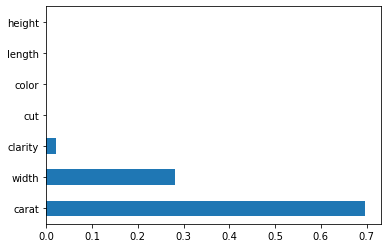

In [143]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestRegressor(max_depth=3)
R2 Value: 0.8838671164257722

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    559           787.0
1   2201          1688.0
2   1238           787.0
3   1304           787.0
4   6901         10928.0
Mean Accuracy on test data: 77.82056325812746
Median Accuracy on test data: 83.00863138057956

Accuracy values for 10-fold Cross Validation:
 [68.28740275 63.46793416 71.8574484  66.46718016 69.97482834 76.42467356
 82.00421714 48.71930707 74.5099494  67.66586782]

Final Average Accuracy of the model: 68.94


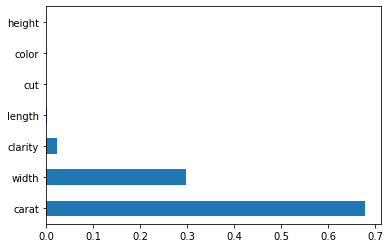

In [144]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[20:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.976991829196869

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    559           557.0
1   2201          2378.0
2   1238    

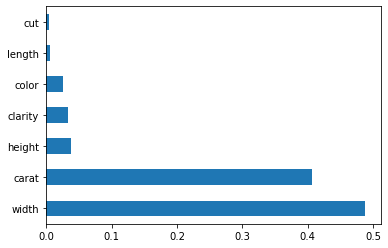

In [145]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [146]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9748973821494882

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    559           534.0
1   2201          2719.0
2   1238          1238.0
3   1304          1220.0
4   6901         11235.0
Mean Accuracy on test data: 89.14917137578522
Median Accuracy on test data: 92.4194566659956

Accuracy values for 10-fold Cross Validation:
 [78.75100513 83.69526652 83.31629597 79.5077599  77.7201866  81.94737707
 83.3424561  81.23478554 82.33188453 81.52267386]

Final Average Accuracy of the model: 81.34


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

<b>XG Boost is chosen due to it's accuracy</b>

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [147]:
DataForML.head()

,price,cut,color,clarity,carat,length,width,height
0,326,1,5,102,0.23,3.95,3.98,2.43
1,326,2,5,101,0.21,3.89,3.84,2.31
2,327,3,5,201,0.23,4.05,4.07,2.31
3,334,2,8,202,0.29,4.20,4.23,2.63
4,335,3,9,102,0.31,4.34,4.35,2.75


In [148]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['cut', 'color', 'clarity','carat','length','width','height']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53940, 7)
(53940,)


#### Cross validating the final model accuracy with less predictors

In [149]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.1185134  88.67336798 87.71531529 85.28987509 83.31786282 87.02125877
 87.40092052 83.36514809 88.28644408 86.75782845]

Final Average Accuracy of the model: 86.49


In [150]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [151]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [152]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


#### Step 3. Create a python function

In [153]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
     # Converting the binary nominal variable sex to numeric
    InputData['cut'].replace({'Ideal':1, 'Premium':2,'Good':3,'Very Good':4,'Fair':5},inplace=True)
    InputData['color'].replace({'E':5, 'I':8,'J':9,'H':8,'F':6,'G':8,'D':4}, inplace=True)
    InputData['clarity'].replace({'SI2':102,'SI1':101,'VS1':201,'VS2':202,'VVS2':301,'VVS1':302,'I1':21,'IF':22}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['carat', 'cut', 'color', 'clarity', 'length',
       'width', 'height']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [157]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[0.23,'Ideal','E','VS1',3.87,4.6,2.31],
     [0.35,'Good','I','VS2',4,6,2],
     [0.4,'Very Good','H','VVS2',2.8,3.5,1.2],
     [0.6,'Fair','I','I1',5,3.5,2.6]],
columns=['carat', 'cut', 'color', 'clarity', 'length',
       'width', 'height'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   carat        cut color clarity  length  width  height
0   0.23      Ideal     E     VS1    3.87    4.6    2.31
1   0.35       Good     I     VS2    4.00    6.0    2.00
2   0.40  Very Good     H    VVS2    2.80    3.5    1.20
3   0.60       Fair     I      I1    5.00    3.5    2.60


,Prediction
0,13873.0
1,12862.0
2,14028.0
3,14014.0
